# Red Wine Quality Prediction

### The goal of the analysis is to model the quality of red wine based on its physical properties.




Input Variables:
<b><i>
+ 1 - fixed acidity 
+ 2 - volatile acidity 
+ 3 - citric acid 
+ 4 - residual sugar
+ 5 - chlorides
+ 6 - free sulfur dioxide
+ 7 - total sulfur dioxide
+ 8 - density
+ 9 - pH
+ 10 - sulphates
+ 11 - alcohol content
</b></i>

Output Variable:
<b><i>
+ 12 – quality of wine (score between 0 and 10)
</b></i>

### Importing Necessary Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 6)
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

### Reading the CSV File using pandas  read_csv function. The Separator used is ';'

In [2]:
raw_data=pd.read_csv('E:/Machine Learning/Red Wine quality/winequality-red.csv',sep=';')

In [3]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Determining Null,Memory usage and data type of Variables using info function
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Using correlation to get an overview of the highly correlated variables

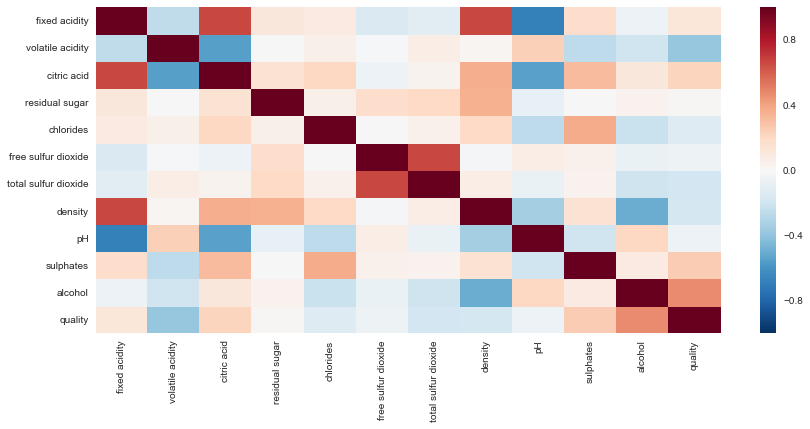

In [7]:
sns.heatmap(raw_data.corr())

## Exploratory Data Analysis(EDA) 

In [8]:
#Examining each parameter

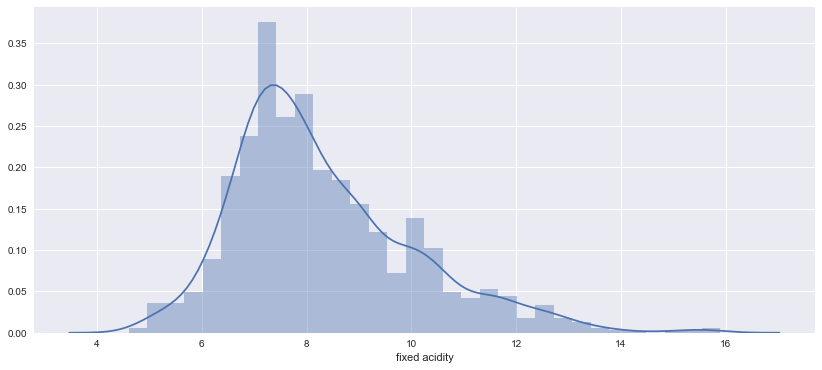

In [9]:
sns.distplot(raw_data['fixed acidity'])

Data distribution is skewed.

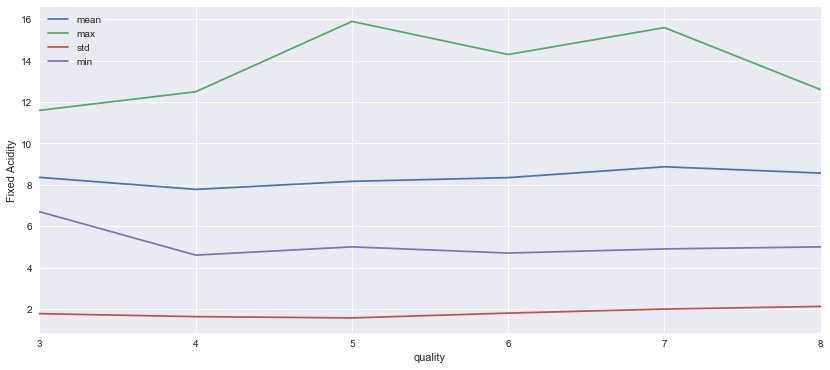

In [10]:
raw_data.groupby('quality')['fixed acidity'].agg(['mean','max','std','min']).plot()
plt.ylabel('Fixed Acidity')

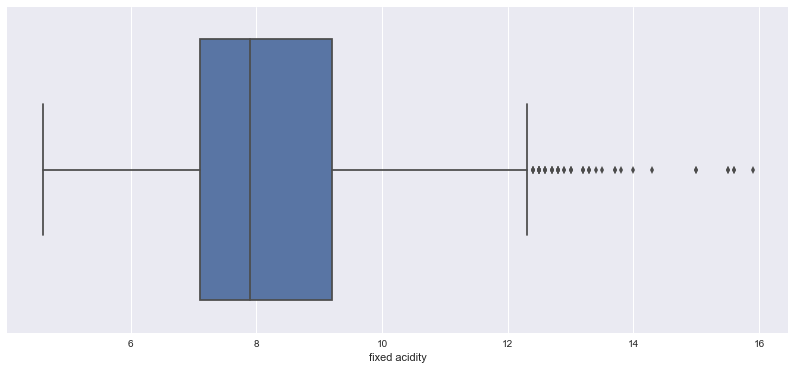

In [11]:
#raw_data.boxplot('fixed acidity')
sns.boxplot(raw_data['fixed acidity'])

From the boxplot we can see that there are lot of outliers

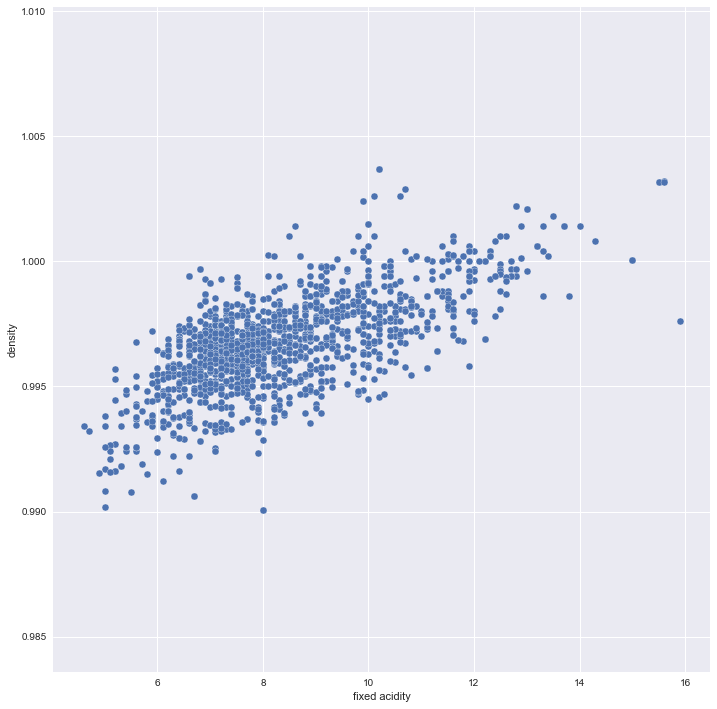

In [12]:
sns.pairplot(raw_data,x_vars='fixed acidity',y_vars='density',size=10)

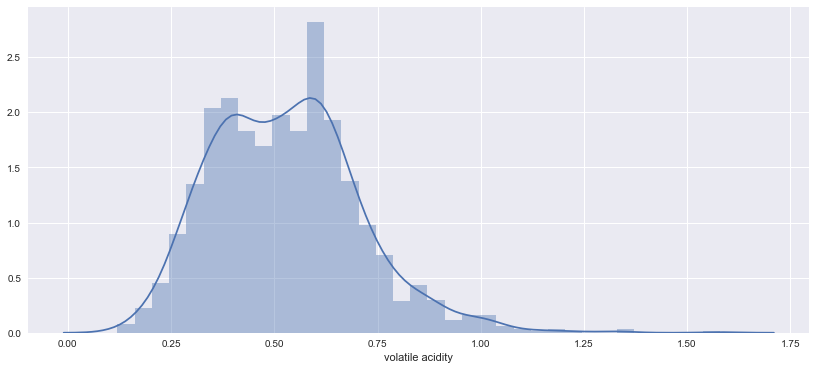

In [13]:
sns.distplot(raw_data['volatile acidity'])

In [14]:
raw_data.groupby('quality')['volatile acidity'].agg(['mean','max','std','min'])

,mean,max,std,min
quality,,,,
3,0.884500,1.580,0.331256,0.44
4,0.693962,1.130,0.220110,0.23
5,0.577041,1.330,0.164801,0.18
6,0.497484,1.040,0.160962,0.16
7,0.403920,0.915,0.145224,0.12
8,0.423333,0.850,0.144914,0.26


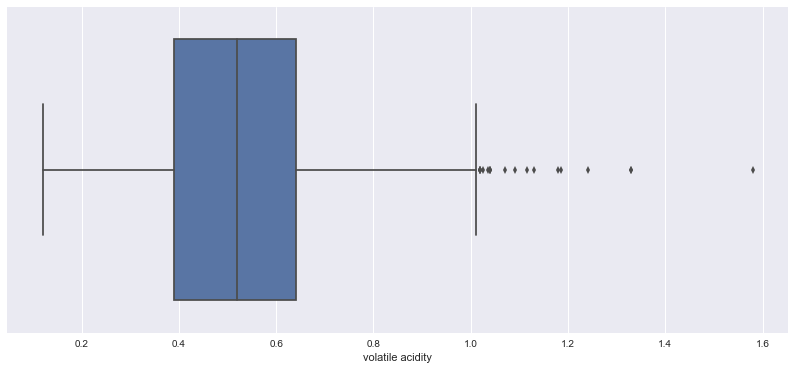

In [15]:
sns.boxplot(raw_data['volatile acidity'])

There are outliers in this variable also

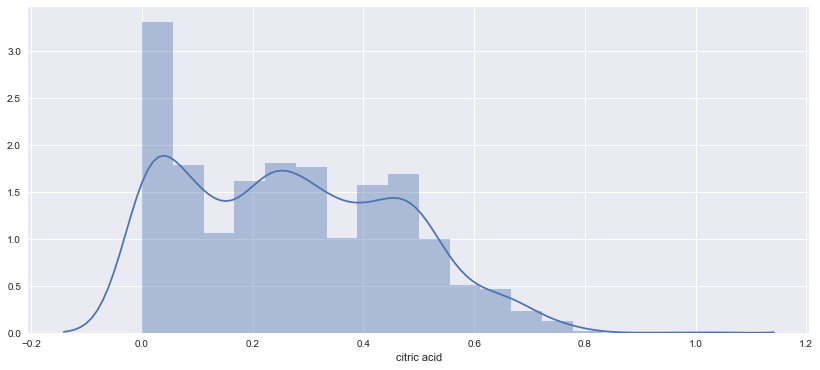

In [16]:
sns.distplot(raw_data['citric acid'])

In [17]:
np.sum(raw_data['citric acid']==0)

132

In [18]:
raw_data.groupby('quality')['citric acid'].agg(['mean','max','std','min'])

,mean,max,std,min
quality,,,,
3,0.171000,0.66,0.250664,0.00
4,0.174151,1.00,0.201030,0.00
5,0.243686,0.79,0.180003,0.00
6,0.273824,0.78,0.195108,0.00
7,0.375176,0.76,0.194432,0.00
8,0.391111,0.72,0.199526,0.03


There are lot of zero values

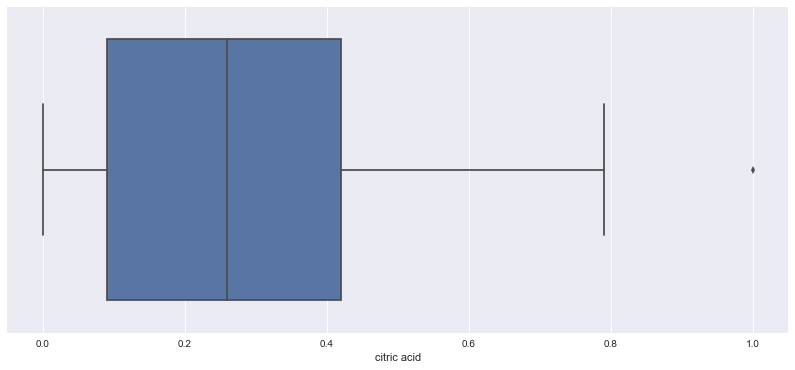

In [19]:
sns.boxplot(raw_data['citric acid'])

There is only one outlier and the data is widely spread

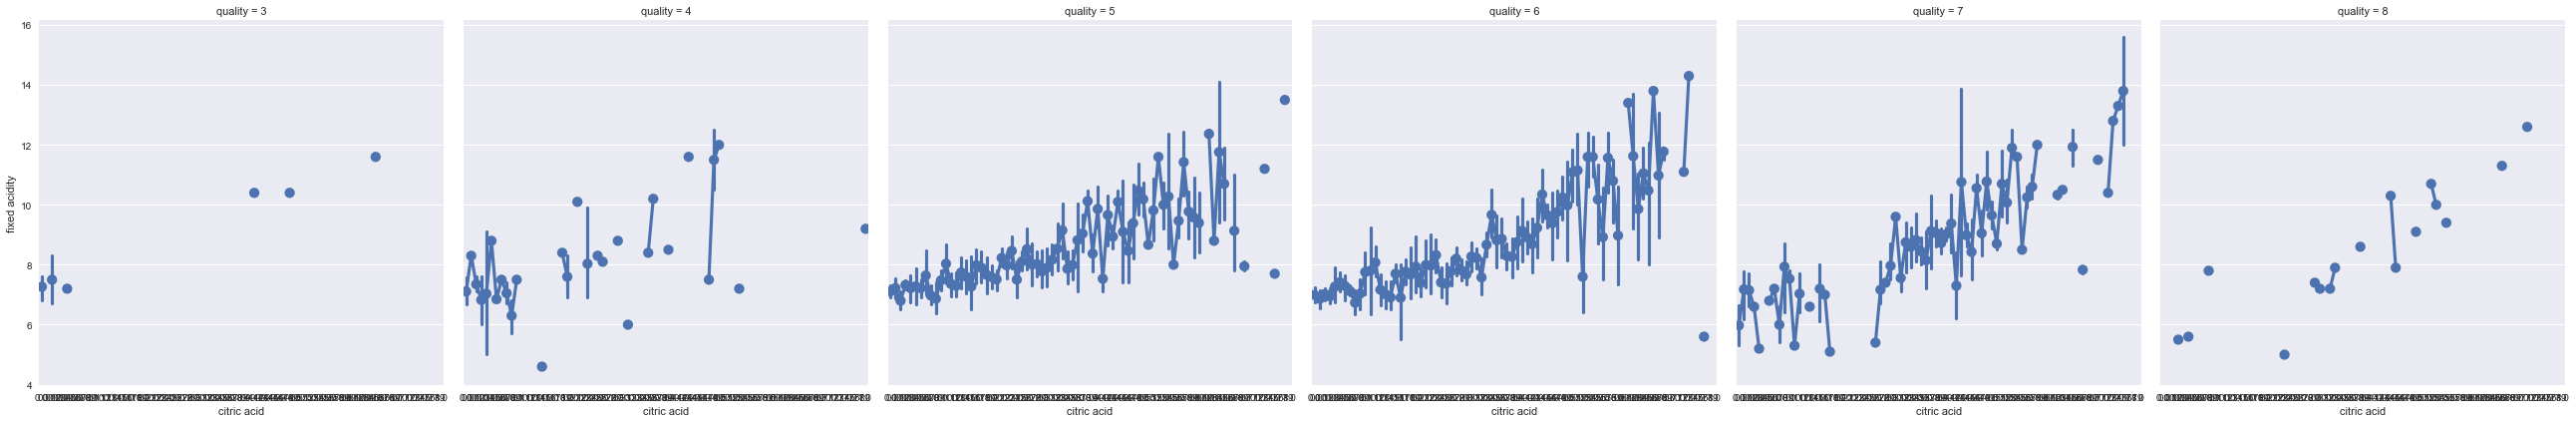

In [20]:
sns.factorplot(x='citric acid',y='fixed acidity',data=raw_data,size=6,col='quality')

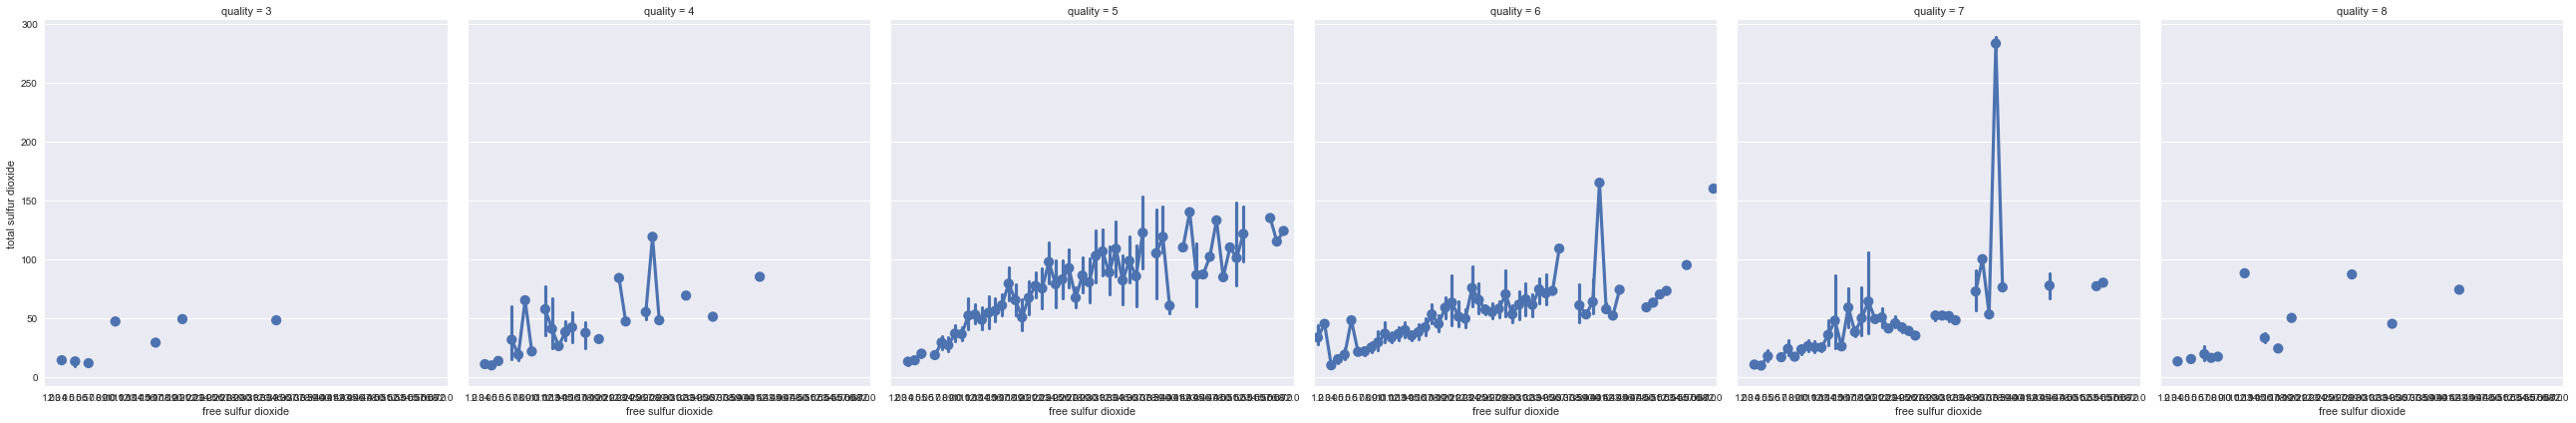

In [21]:
sns.factorplot(x='free sulfur dioxide',y='total sulfur dioxide',data=raw_data,size=6,col='quality')

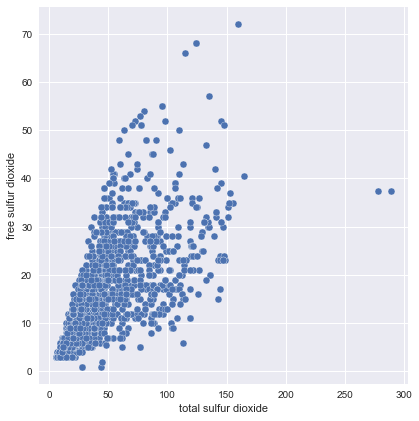

In [22]:
sns.pairplot(raw_data,x_vars='total sulfur dioxide',y_vars='free sulfur dioxide',size=6)

There is a strong correlation among the two variables.

In [23]:
X_raw=raw_data.drop('quality',axis=1)

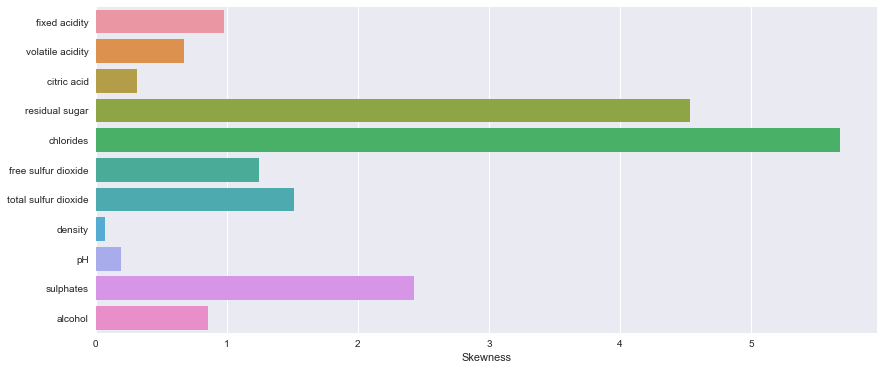

In [24]:
sns.barplot(skew(X_raw),X_raw.columns)
plt.xlabel('Skewness')

In [25]:
y=raw_data['quality']

Sice the data is not in same scale, applying scaling to the data

In [26]:
X_Scaled=StandardScaler().fit_transform(X_raw)

In [27]:
X_Scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ..., 
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.33, random_state=42)

## NULL RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [29]:
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
print('Null RMSE with all features included:',math.sqrt(mean_squared_error(y_test,y_null)))

Null RMSE with all features included: 0.8137836860868168


## Removing Correlated Features and NULL RMSE

In [30]:
X_featured=raw_data.drop(['quality','free sulfur dioxide','citric acid'],axis=1)
X_featured=StandardScaler().fit_transform(X_featured)
y_featured=raw_data['quality']
X_featured_train, X_featured_test, y_featured_train, y_featured_test = train_test_split(X_featured, y_featured, test_size=0.33, random_state=42)
y_null = np.zeros_like(y_featured_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_featured_test.mean())
print('Null RMSE with correlated features removed:',math.sqrt(mean_squared_error(y_featured_test,y_null)))

Null RMSE with correlated features removed: 0.8137836860868168


After removing correlated features we are getting the same RMSE

In [31]:
rmse_array={}

# Linear Regression with all Parameters

In [32]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)
y_pred=linReg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE with all features included:',mse)
print('RMSE with all features included:',math.sqrt(mse))
rmse_array['LR']=math.sqrt(mse)

MSE with all features included: 0.42420408998
RMSE with all features included: 0.6513095193379135


# Linear Regression with Correlated Parameters Removed

In [33]:
linReg=LinearRegression()
linReg.fit(X_featured_train,y_featured_train)
y_pred=linReg.predict(X_featured_test)

mse=mean_squared_error(y_featured_test,y_pred)
print('MSE with correlated features removed:',mse)
print('RMSE with correlated features removed:',math.sqrt(mse))
rmse_array['LR_Filtered_Param']=math.sqrt(mse)

MSE with correlated features removed: 0.426709275342
RMSE with correlated features removed: 0.6532298794004399


# Random Forest Regressor with all Parameters

In [34]:
randomForest=RandomForestRegressor(n_estimators=10)
randomForest.fit(X_train,y_train)
y_pred=randomForest.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE with all features included:',mse)
print('RMSE with all features included:',math.sqrt(mse))
rmse_array['RF']=math.sqrt(mse)

MSE with all features included: 0.393996212121
RMSE with all features included: 0.6276911757554124


# Random Forest Regression with Correlated Parameters Removed

In [35]:
randomForest=RandomForestRegressor(n_estimators=10)
randomForest.fit(X_featured_train,y_featured_train)
y_pred=randomForest.predict(X_featured_test)

mse=mean_squared_error(y_featured_test,y_pred)
print('MSE with correlated features removed:',mse)
print('RMSE with correlated features removed:',math.sqrt(mse))
rmse_array['RF_Filtered_Param']=math.sqrt(mse)

MSE with correlated features removed: 0.384393939394
RMSE with correlated features removed: 0.6199951123952022


# KNN Regressor with all Parameters

In [77]:
knn=KNeighborsRegressor(n_neighbors=7,weights='distance')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE with all features included:',mse)
print('RMSE with all features included:',math.sqrt(mse))
rmse_array['KNN']=math.sqrt(mse)

MSE with all features included: 0.385573763011
RMSE with all features included: 0.6209458615780294


# KNN Regressor with Correlated Parameters Removed

In [78]:
knn=KNeighborsRegressor(n_neighbors=7,weights='distance')
knn.fit(X_featured_train,y_featured_train)
y_pred=knn.predict(X_featured_test)

mse=mean_squared_error(y_featured_test,y_pred)
print('MSE with correlated features removed:',mse)
print('RMSE with correlated features removed:',math.sqrt(mse))
rmse_array['KNN__Filtered_Param']=math.sqrt(mse)

MSE with correlated features removed: 0.363438366812
RMSE with correlated features removed: 0.6028584965076981


# SVM Regressor with all Parameters

In [79]:
svr=SVR(C=1.7)
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print('MSE with all features included:',mse)
print('RMSE with all features included:',math.sqrt(mse))
rmse_array['SVM']=math.sqrt(mse)

MSE with all features included: 0.380157709195
RMSE with all features included: 0.6165693060761024


# SVM Regressor with Correlated Parameters Removed

In [80]:
svr=SVR(C=1.7)
svr.fit(X_featured_train,y_featured_train)
y_pred=svr.predict(X_featured_test)

mse=mean_squared_error(y_featured_test,y_pred)
print('MSE with correlated features removed:',mse)
print('RMSE with correlated features removed:',math.sqrt(mse))
rmse_array['SVM__Filtered_Param']=math.sqrt(mse)

MSE with correlated features removed: 0.387055299538
RMSE with correlated features removed: 0.6221376853544451


# Result

In [81]:
rmse_array

{'KNN': 0.6209458615780294,
 'KNN__Filtered_Param': 0.6028584965076981,
 'LR': 0.6513095193379135,
 'LR_Filtered_Param': 0.6532298794004399,
 'RF': 0.6276911757554124,
 'RF_Filtered_Param': 0.6199951123952022,
 'SVM': 0.6165693060761024,
 'SVM__Filtered_Param': 0.6221376853544451}

([<matplotlib.axis.XTick at 0x11e5f780>,
 <a list of 8 Text xticklabel objects>)

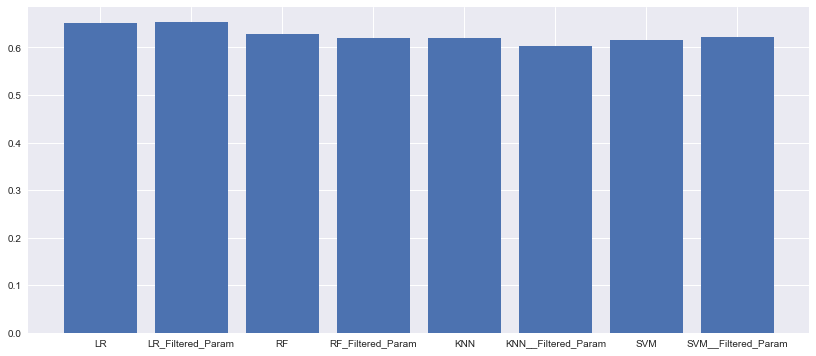

In [82]:
plt.bar(range(len(rmse_array)), list(rmse_array.values()), align='center')
plt.xticks(range(len(rmse_array)), list(rmse_array.keys()))

The Least RMSE:0.6028584965076981 
Algorithm: KNN Regressor